**Problem Statement**

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


###Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing other libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Leads.csv to Leads.csv


In [5]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Leads.csv']))
pd.set_option('display.max_columns',None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###Inspecting the Dataframe

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Let's check the dimensions
df.shape

(9240, 37)

In [11]:
#Let's look at the statistical aspects
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
#Let's see the type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###Data Preparation

**Dealing with Missing Values**

In [13]:
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Inferences**

- We should immediately drop variables which have almost 35% or more missing values, which are  Asymmetrique Activity Index, Asymmetrique Profile Index,  Asymmetrique Activity Score and Asymmetrique Profile Score and Lead Quality, Tags
- Also we can see Lead Source has 0.3% missing values, we can drop those rows as well

In [14]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
         'Asymmetrique Profile Score','Lead Quality', 'Tags'],axis=1,inplace=True)
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**Observations**
- There are some variables that need to be fixed as they have a lot of missing values
- But we simply shouldn't drop them as they might be important

####Missing Value Imputation
- Categorical Variables: the most occured value is chosen to replace the missing
- Numerical Variables: Quickly checking with box-plot, the mean value is chosen to replace the missing
- For some categorical variables, we witnessed 'Select' as an input which is probably input error
- Hence 'Select' values are treated as missing values & replaced with most frequent values

In [15]:
#Replace null country with 'India'
df['Country'].fillna(df['Country'].mode()[0], inplace = True)

#Replace null and 'Select' Specialization with 'Finance Management'
df['Specialization'].fillna('Finance Management', inplace = True)
df['Specialization'] = np.where(df['Specialization'] == 'Select', 'Finance Management',df['Specialization'])

#Replace null and 'Select' with 'Online Search'
df['How did you hear about X Education'].fillna('Online Search', inplace = True)
df['How did you hear about X Education'] = np.where(df['How did you hear about X Education'] == 'Select','Online Search',df['How did you hear about X Education'])

#Impute null with 'Unemployed'
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0], inplace = True)

#Impute null with  'Better Career Prospects'
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0], inplace = True)


#Replace null and 'Select' with 'Potential Lead'
df['Lead Profile'].fillna('Potential Lead', inplace = True)
df['Lead Profile'] = np.where(df['Lead Profile'] == 'Select', 'Potential Lead',df['Lead Profile'])


#Replace 'select' and null with 'Mumbai'
df['City'].fillna('Mumbai', inplace = True)
df['City'] = np.where(df['City'] == 'Select', 'Mumbai',df['City'])


#Impute null with mean value
df['TotalVisits'].fillna(round(df['TotalVisits'].mean(),2), inplace = True)

#Impute null with mean value
df['Page Views Per Visit'].fillna(round(df['Page Views Per Visit'].mean(),2), inplace = True)

#Impute null with 'Email Opened'
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace = True)

In [16]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [18]:
df.dropna(inplace=True)
df.shape

(9204, 31)

In [19]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

#### Lets start with Exploratory Data Analysis as there are no more missing values
- We know 'Converted' is our target variables, hence we have to check how much importance an independent variable has wrt 'Converted'

In [20]:
df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025006,0.021863,0.019740,0.058078
Converted,0.025006,1.000000,0.032524,0.366428,0.000208
TotalVisits,0.021863,0.032524,1.000000,0.217067,0.511068
Total Time Spent on Website,0.019740,0.366428,0.217067,1.000000,0.314470
Page Views Per Visit,0.058078,0.000208,0.511068,0.314470,1.000000


**Observations**
- Strong Correlation between Total Visits & Page Views per Visit
- Total Time Spent on website has correlation with converted
- Correlation between Page views per visit & total time spent on website


In [21]:
# Percent of Binary Classes
(df['Converted'].value_counts()/len(df))*100
# 38% are actually getting converted to biz

0    61.62538
1    38.37462
Name: Converted, dtype: float64

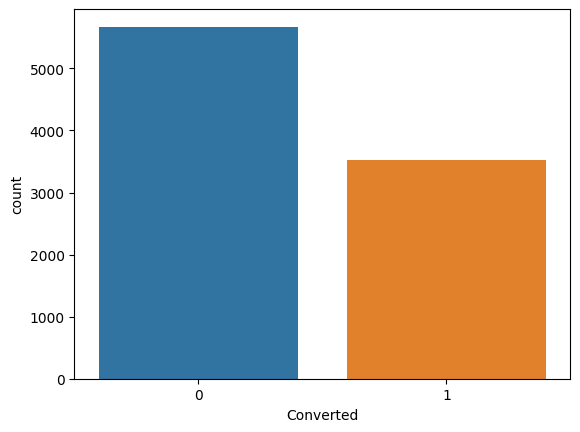

In [22]:
sns.countplot(data=df,x='Converted')
plt.show()

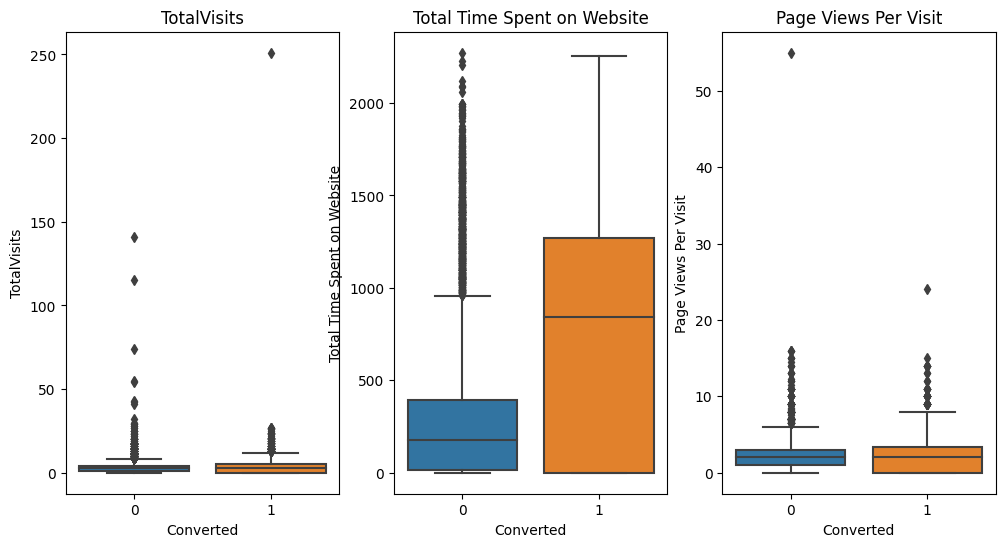

In [24]:
#Plotting bloxplot for all numerical values to understand their association wrt convertion rate

num_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

fig, axs = plt.subplots(1, 3,figsize=(12,6))
sns.boxplot(ax=axs[0],data=df,x='Converted',y='TotalVisits')
axs[0].set_title('TotalVisits')
sns.boxplot(ax=axs[1],data=df,x='Converted',y='Total Time Spent on Website')
axs[1].set_title('Total Time Spent on Website')
sns.boxplot(ax=axs[2],data=df,x='Converted',y='Page Views Per Visit')
axs[2].set_title('Page Views Per Visit')
plt.show()

**Observations**
- For total visits we can see there are lot of outliers & hence it is inconclusive
- For total time spent, as we see, more time someone spent here, has more convertion rate
- For page views also, there are some outliers, but yes more page views contributes to higher convertion rate

In [25]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Opened


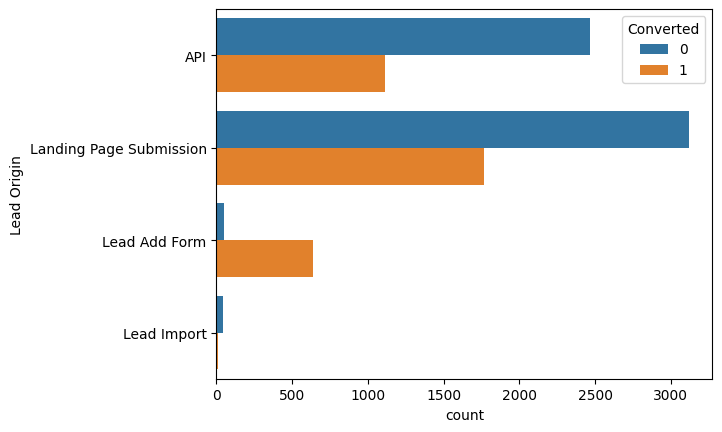

In [26]:
sns.countplot(data=df,y='Lead Origin',hue='Converted')
plt.show()

**Observations**
- API & Landing Page Submission constitutes the major contribution for convertion but Convertion rates are very bad
- Leading Add Form has major chance for higher convertion rates

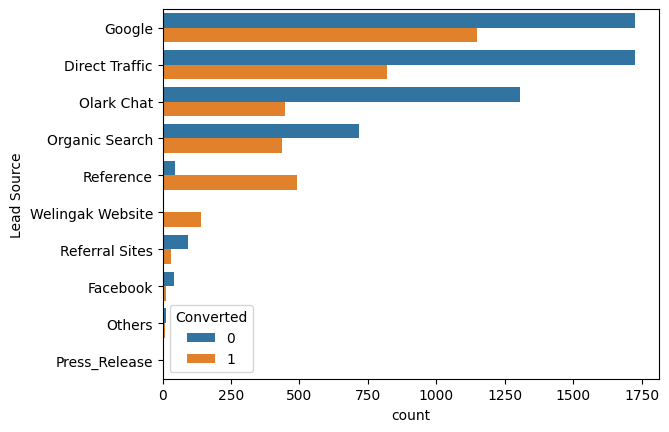

In [27]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Live Chat','Social Media','Press_Relase',
                                              'NC_EDM','Pay per Click Ads','youtubechannel','blog','testone',
                                              'WeLearn','welearnblog_Home'],'Others')

sns.countplot(data=df,y='Lead Source',hue='Converted',order = df['Lead Source'].value_counts().index)
plt.show()

**Observations**
- For Lead Source, Online Search Engines have more people opt for a course, we should pay more attention to these as they generate major traffic
- We can see Referrence & Welingak Website have higher convertion rates, It has turned out to be a good Lead Source for new business

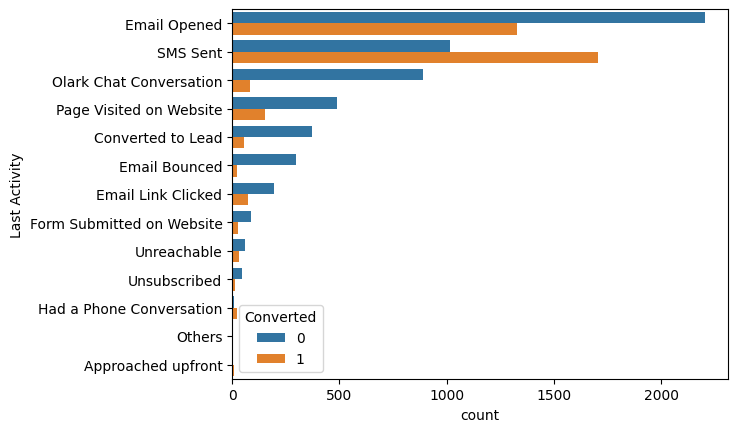

In [28]:
df['Last Activity'] = df['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Received',
                                                   'Email Marked Spam','View in browser link Clicked'],'Others')

sns.countplot(data=df,y='Last Activity',hue='Converted',order = df['Last Activity'].value_counts().index)
plt.show()

**Observations**
- We can see SMS Sent, Phone conversation and upfront approaching have better conversions
- Emails also has a major turnout, but needs to be worked upon

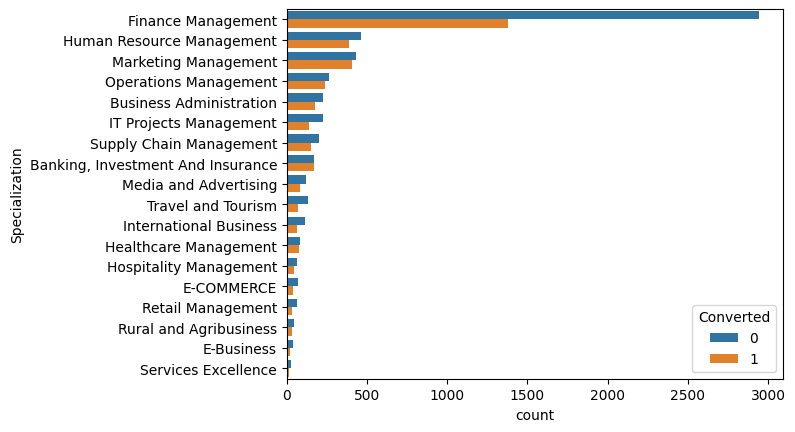

In [29]:
sns.countplot(data=df,y='Specialization',hue='Converted',order = df['Specialization'].value_counts().index)
plt.show()

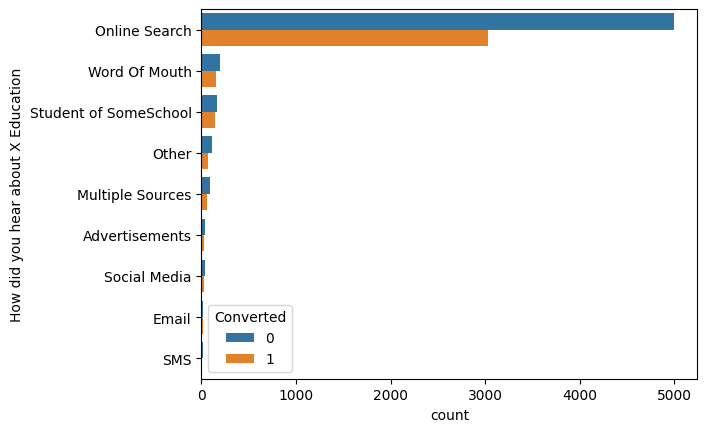

In [31]:
sns.countplot(data=df,y='How did you hear about X Education',hue='Converted',
              order = df['How did you hear about X Education'].value_counts().index)
plt.show()

**Observation**
- Online Search seems to be an important variable
- Higher convertion rates are from word of mouth

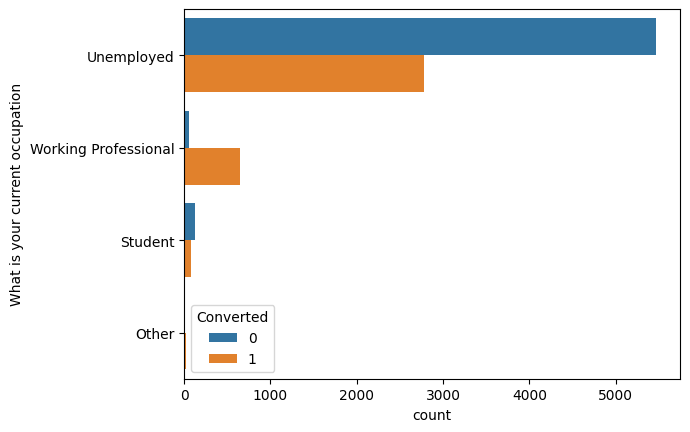

In [32]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Housewife','Businessman'],'Other')
sns.countplot(data=df,y='What is your current occupation',hue='Converted',
              order = df['What is your current occupation'].value_counts().index)
plt.show()

**Observation**
- Its pretty clear, unemployed, working and students are major variables for higher convertion rates

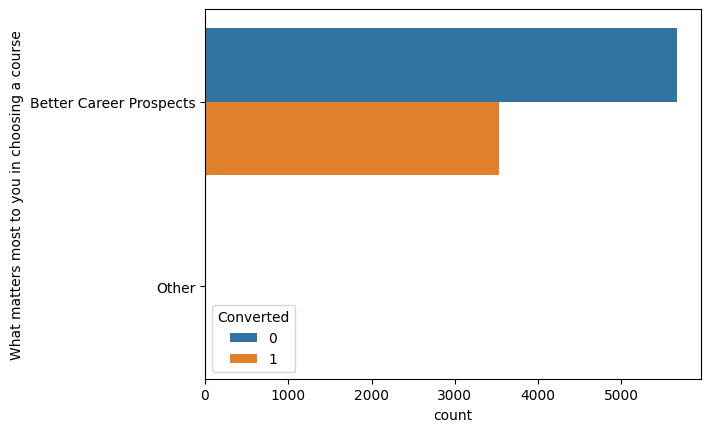

In [33]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(['Flexibility & Convenience'],'Other')
sns.countplot(data=df,y='What matters most to you in choosing a course',hue='Converted',
              order = df['What matters most to you in choosing a course'].value_counts().index)
plt.show()

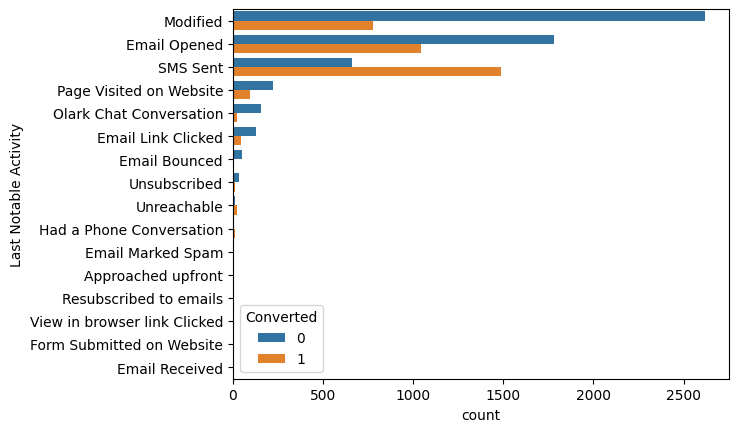

In [34]:
sns.countplot(data=df,y='Last Notable Activity',hue='Converted',
              order = df['Last Notable Activity'].value_counts().index)
plt.show()

In [35]:
df['Last Notable Activity'].value_counts()

Modified                        3397
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

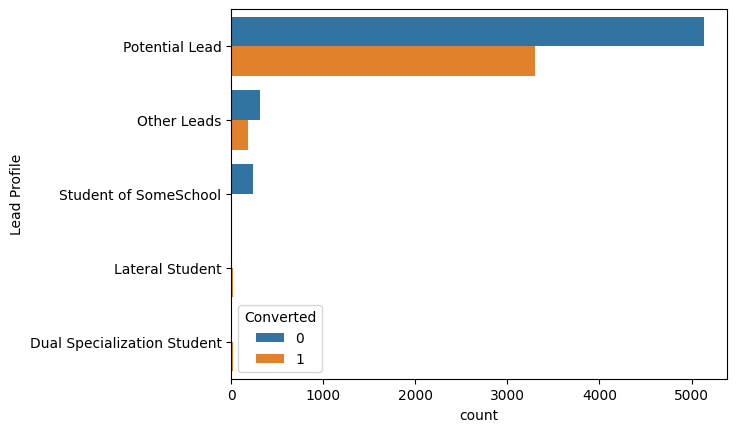

In [36]:
sns.countplot(data=df,y='Lead Profile',hue='Converted',order = df['Lead Profile'].value_counts().index)
plt.show()

**Dropping Variables**
- Few variables have either a value or 'Other' in it, which doesnt really help us to infer anything
- We will be dropping the following variables - 'Prospect ID','Lead Number','Do Not Email','Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'
- Also we can see lot of variables with only 1 value in it, which tends to have more weightage
- We can drop 'Lead Number', as it is just a categorical field with no inference
- We have dropped Country & City as Country had > 80% to India


In [37]:
df.shape

(9204, 31)

In [38]:
df.drop(['Prospect ID','Lead Number','Do Not Email','Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine',
         'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
         'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
         'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview','Country','City'],axis=1,inplace=True)

In [39]:
df.shape

(9204, 12)

In [40]:
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Online Search,Unemployed,Potential Lead,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Online Search,Unemployed,Potential Lead,Email Opened


<Figure size 2000x1500 with 0 Axes>

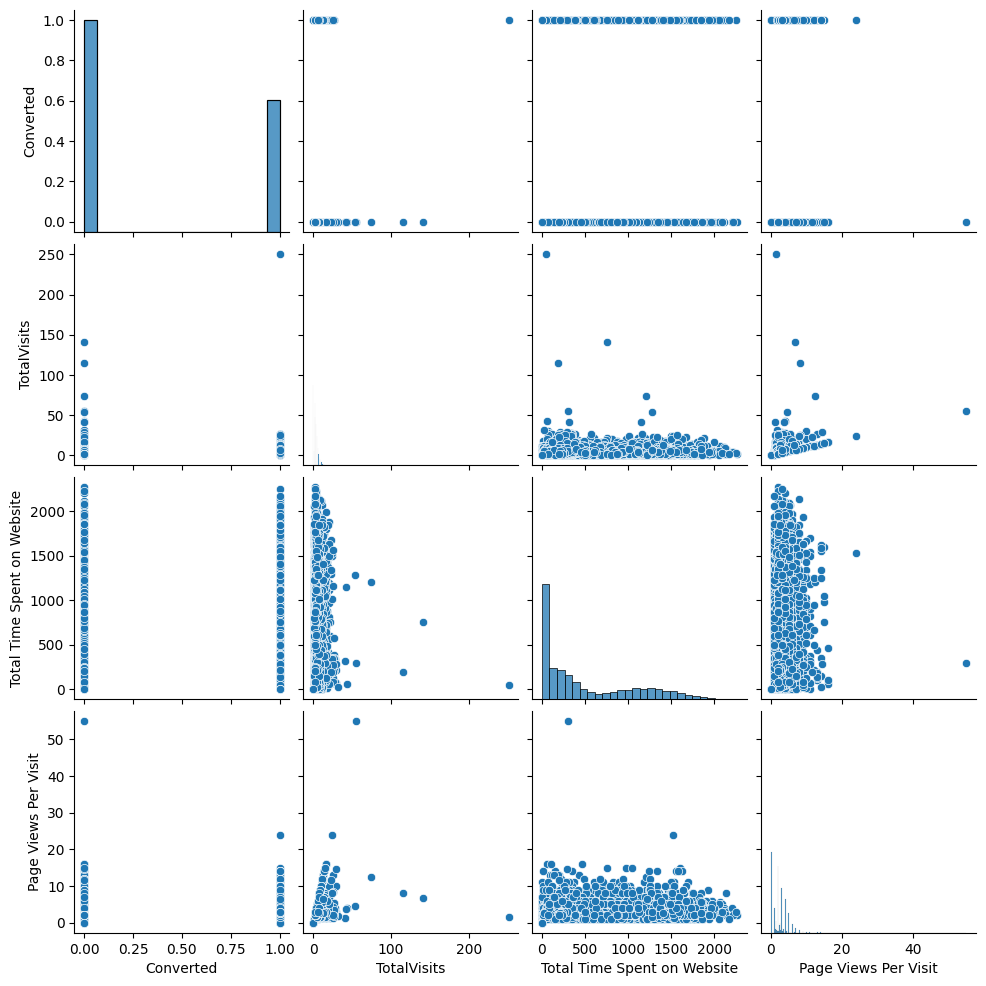

In [42]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

#### Converting Categorical Data to Numerical Data
- For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [43]:
#Identifying binary variables for 0/1 conversion from Yes/No
df.columns
x = list(df.columns)
varlist = []
for i in x:
    if len(df[i].value_counts())==2:
        varlist.append(i)

varlist

['Converted']

In [44]:
#Identifying categorical variables with multiple levels
df.columns
x = list(df.columns)
catlist = []
for i in x:
    if len(df[i].value_counts())>=3 and df[i].dtype=='object':
        catlist.append(i)

catlist

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Lead Profile',
 'Last Notable Activity']

In [45]:
# Creating a dummy variable for some of the categorical variables and dropping the first one

dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                           'How did you hear about X Education', 'What is your current occupation',
                           'Lead Profile', 'Last Notable Activity']], drop_first=True)

dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
df1 = pd.concat([df, dummy], axis=1)
df1.shape

(9204, 83)

#### Dropping the repeated variables

In [47]:
#Drop variables for which dummies have been created
df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
              'How did you hear about X Education', 'What is your current occupation',
              'Lead Profile','Last Notable Activity' ], axis=1,inplace=True)

In [48]:
df1.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df1.shape

(9204, 75)

In [50]:
df1.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.032524,0.366428,0.000208,-0.048171,0.318482,-0.022591,-0.023498,0.021455,-0.128235,-0.004617,0.004408,-0.011634,0.272448,-0.032754,0.155006,-0.116972,-0.120782,-0.039218,-0.011841,-0.033075,0.041109,-0.210277,0.008638,-0.083090,0.323589,-0.010474,-0.024191,0.026588,-0.002488,-0.007360,-0.124761,0.029874,0.008591,0.047895,-0.000516,-0.006987,0.066675,0.010800,0.043644,-0.009428,0.007522,-0.014774,0.019971,-0.008976,0.012724,-0.004084,-0.032866,0.005753,-0.017122,0.004429,0.029770,0.020926,-0.004804,-0.282086,0.315102,0.060414,-0.006871,0.051786,-0.116805,-0.038936,-0.035187,0.018682,-0.020018,0.013210,-0.008226,0.043728,-0.243806,-0.072382,-0.035514,0.013210,0.350067,0.036895,-0.016876,-0.008226
TotalVisits,0.032524,1.000000,0.217067,0.511068,0.288003,-0.157251,-0.028258,-0.027842,0.106983,-0.311901,0.193414,-0.004992,0.016943,-0.135118,0.081338,-0.076365,-0.071142,-0.046563,-0.022509,0.020173,0.012136,0.016822,-0.140285,0.016558,0.224563,-0.002832,0.015977,0.004826,0.041172,0.016654,0.023190,-0.212911,0.036041,0.017588,0.062590,0.030327,0.034792,0.023161,0.043842,0.020775,0.037239,0.058071,0.016011,0.062641,0.063932,0.012368,0.025571,-0.110818,0.045807,0.006096,0.026134,0.045149,0.060870,-0.023576,0.011222,-0.004562,0.001946,0.018533,0.003245,-0.034616,-0.007376,-0.008935,0.001663,0.035062,0.005497,-0.003146,0.022317,-0.106569,-0.037985,0.227395,-0.007468,-0.001606,0.005514,0

- All variables are numeric.

####Test-Train Split

In [51]:
from sklearn.model_selection import train_test_split

In [55]:
# Putting feature variable to X
X = df1.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# We specify this so that the train and test data set always have the same rows
np.random.seed(0)
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5310,0.117740,-0.721902,0.726604,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2181,1.049488,-0.429014,2.539268,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8215,-0.814009,-0.905639,-1.086060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8887,-0.348135,-0.487228,-0.179728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7920,0.117740,-0.547261,0.726604,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# Checking the Convertion Rate
convertion = (sum(df['Converted'])/len(df['Converted'].index))*100
convertion

38.374619730551935

####Looking at Correlations




In [60]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

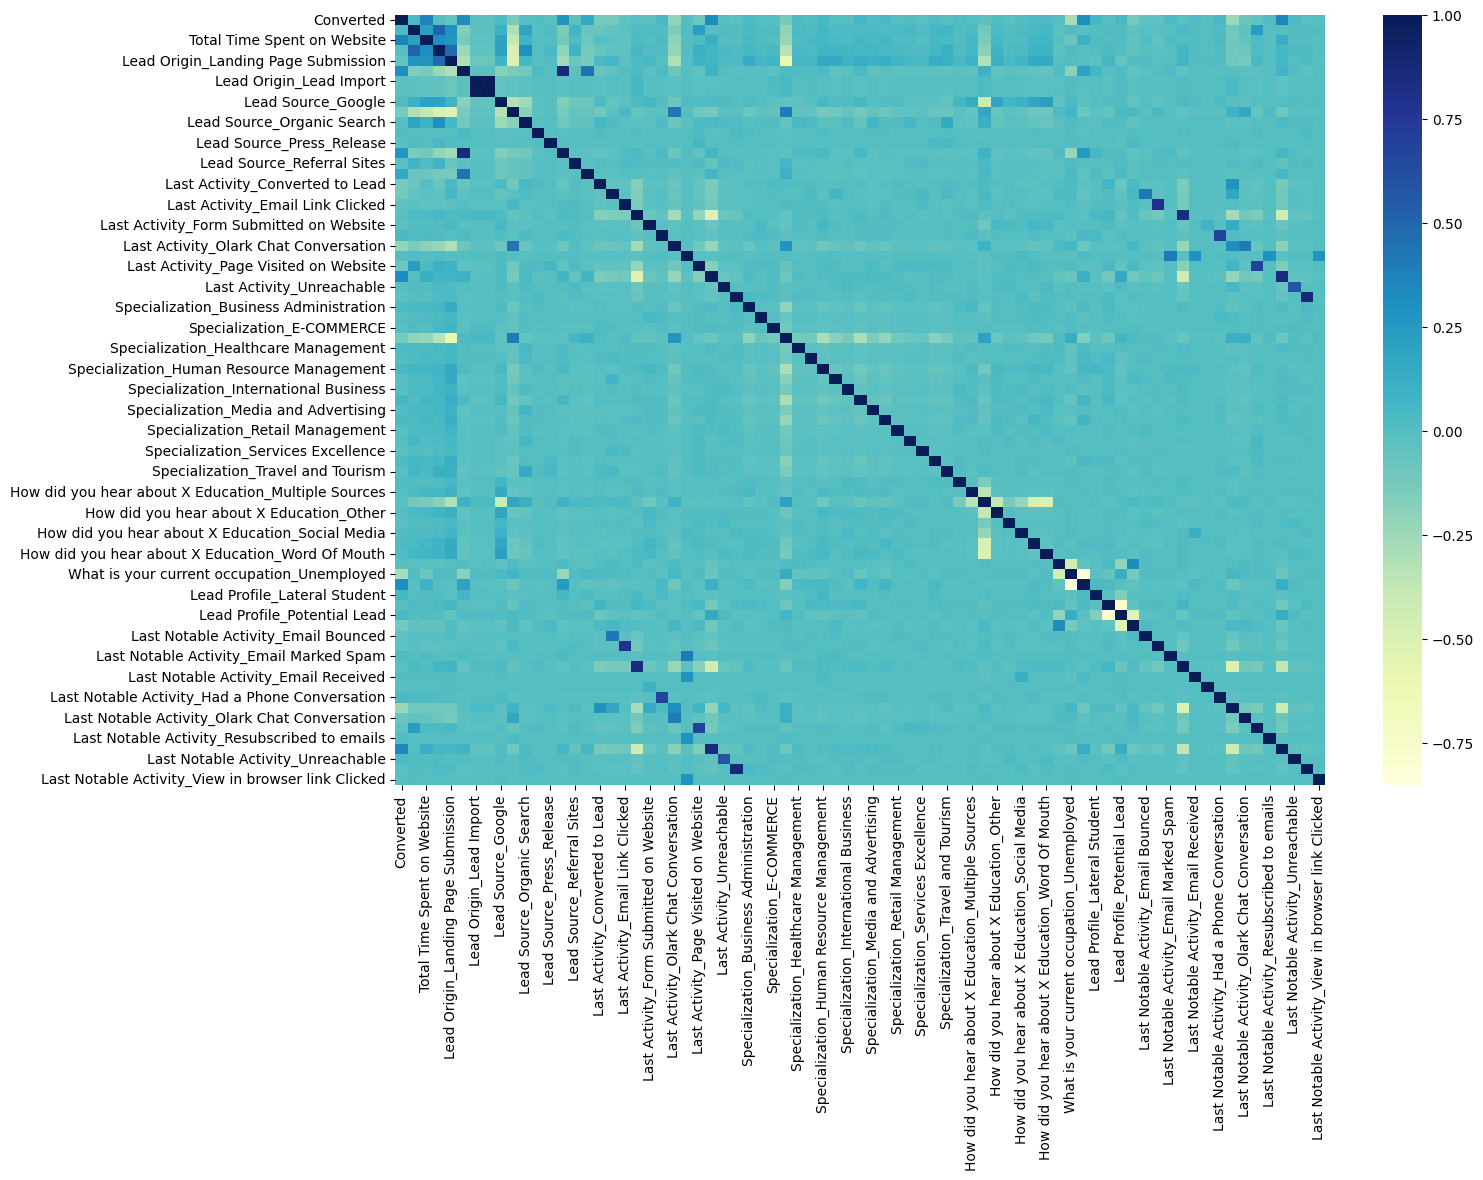

In [62]:
# correlation matrix with heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(),cmap="YlGnBu")
plt.show()

- There are multiple cases of multi-collinearity, let's dive deeper

In [63]:
corr = df1.corr().abs()
corr_sort = corr.unstack().sort_values(kind='quicksort',ascending=False)
newdf = pd.DataFrame(corr_sort,columns=['Corr'])
newdf[newdf['Corr']<1].head(15)

,,Corr
Lead Source_Facebook,Lead Origin_Lead Import,0.990813
Lead Origin_Lead Import,Lead Source_Facebook,0.990813
Lead Source_Reference,Lead Origin_Lead Add Form,0.875206
Lead Origin_Lead Add Form,Lead Source_Reference,0.875206
Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.872666
Last Activity_Unsubscribed,Last Notable Activity_Unsubscribed,0.872666
Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.852241
Last Activity_SMS Sent,Last Notable Activity_SMS Sent,0.852241
What is your current occupation_Unemployed,What is your current occupation_Working Professional,0.849793
What is your current occupation_Working Professional,What is your current occupation_Unemployed,0.849793


#### Dropping highly correlated variables
- We have to keep in mind their corresponding conversation rate. For example, Last Activity SMS Sent & Last Notable Activity SMS Sent, both have good rates but we decided to drop Last Notable Activity SMS Sent as these volumes are less compared to Last Acitvity SMS Sent

In [64]:
df1.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Unreachable',
          'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Had a Phone Conversation',
          'Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'],
         axis=1,inplace=True)
corr = df1.corr().abs()
corr_sort = corr.unstack().sort_values(kind='quicksort',ascending=False)
newdf = pd.DataFrame(corr_sort,columns=['Corr'])
newdf[newdf['Corr']<1].head(15)

,,Corr
Lead Origin_Lead Add Form,Lead Source_Reference,0.875206
Lead Source_Reference,Lead Origin_Lead Add Form,0.875206
What is your current occupation_Unemployed,What is your current occupation_Working Professional,0.849793
What is your current occupation_Working Professional,What is your current occupation_Unemployed,0.849793
Lead Profile_Other Leads,Lead Profile_Potential Lead,0.781156
Lead Profile_Potential Lead,Lead Profile_Other Leads,0.781156
Lead Origin_Landing Page Submission,Specialization_Finance Management,0.598689
Specialization_Finance Management,Lead Origin_Landing Page Submission,0.598689
Lead Profile_Student of SomeSchool,Lead Profile_Potential Lead,0.541924
Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,0.541924


In [65]:
X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Unreachable',
          'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Had a Phone Conversation',
          'Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Unreachable',
          'Last Notable Activity_SMS Sent','Last Notable Activity_Email Opened','Last Notable Activity_Had a Phone Conversation',
          'Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website'], 1)

#### Checking the Correlation Matrix after dropping highly correlated variables

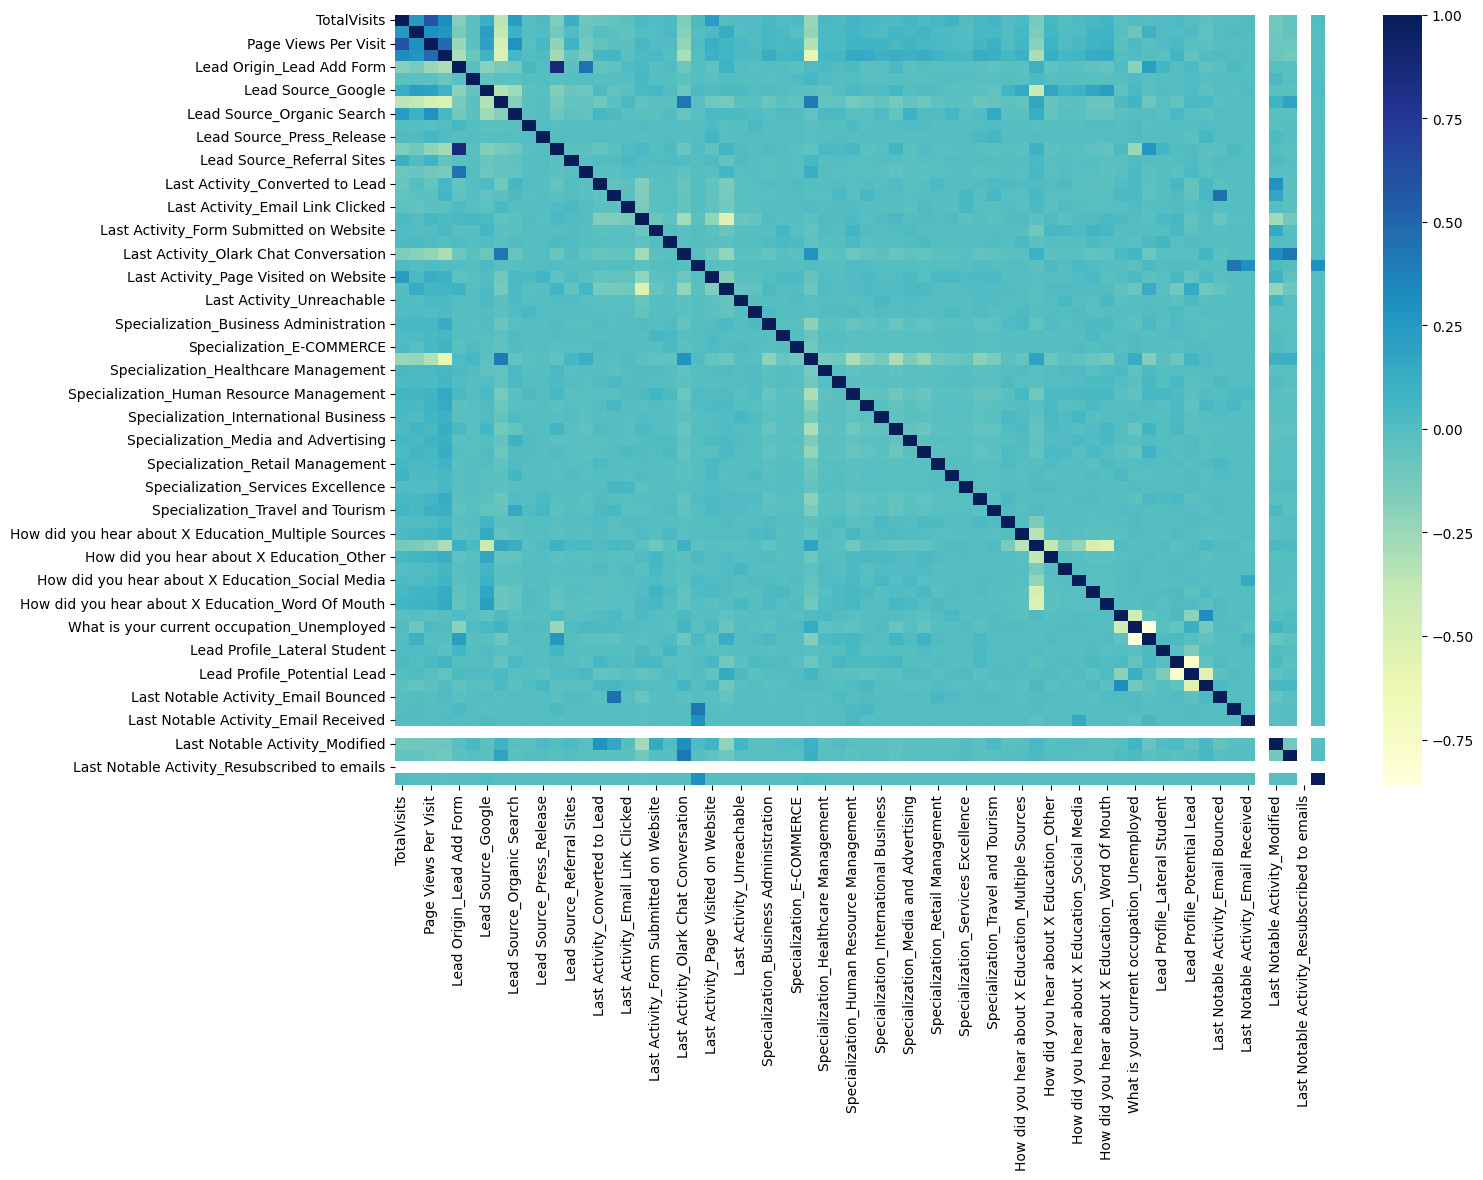

In [66]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(),cmap="YlGnBu")
plt.show()

### Model Building
- Let's start by splitting our data into a training set and a test set.

#### Running the First Training Model

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.5
Date:                Thu, 24 Aug 2023   Deviance:                       5289.0
Time:                        14:08:47   Pearson chi2:                 7.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       47.8694   3.78e+04      0.001      0.999   -7.41e+04    7.42e+04
TotalVisits                                                  0.0942      0.041      2.290      0.022       0.014       0.175
Total Time Spent on Website                                  1.1446      0.041     27.790      0.000       1.064       1.225
Page Views Per Visit                                        -0.1582      0.053     -3.007      0.003      -0.261      -0.055
Lead Origin_Landing Page Submission                         -0.4297      0.118     -3.633      0.000      -0.662      -0.198
Lead Origin_Lead Add Form                                    1.6146      1.222      1.321      0.187      -0.781       4.011
Lead Origin_Lead Import                                      0.3494      0.482      0.725      0.468      -0.595       1.294
Lead Source_Google                                           0.3871      0.105      3.672      0.000       0.181       0.594
Lead Source_Olark Chat                                       1.3138      0.158      8.336      0.000       1.005       1.623
Lead Source_Organic Search                                   0.2412      0.127      1.902      0.057      -0.007       0.490
Lead Source_Others                                           1.2806      0.663      1.932      0.053      -0.018       2.580
Lead Source_Press_Release                                  -20.6904   4.79e+04     -0.000      1.000    -9.4e+04    9.39e+04
Lead Source_Reference                                        2.0149      1.241      1.624      0.104      -0.417       4.447
Lead Source_Referral Sites                                   0.4208      0.323      1.301      0.193      -0.213       1.055
Lead Source_Welingak Website                                 4.8777      1.587      3.074      0.002       1.767       7.988
Last Activity_Converted to Lead                            -24.2486   3.34e+04     -0.001      0.999   -6.55e+04    6.55e+04
Last Activity_Email Bounced                                -25.3625   3.34e+04     -0.001      0.999   -6.56e+04    6.55e+04
Last Activity_Email Link Clicked                           -24.0885   3.34e+04     -0.001      0.999   -6.55e+04    6.55e+04
Last Activity_Email Opened                                 -23.7418   3.34e+04     -0.001      0.999   -6.55e+04    6.55e+04
Last Activity_Form Submitted on Website                    -23.6011   3.34e+04     -0.001      0.999   -6.55e+04    6.55e+04
Last Activity_Had a Phone Conversation                     -21.2896   3.34e+04     -0.001      0.999   -6.55e+04    6.55e+04
Last Activity_Olark Chat Conversation                      -24.8266   3.34e+04     

####Feature Selection Using RFE

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 4),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Ac

In [73]:
col = X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Others', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'How did you hear about X Education_Online Search',
       'How did you hear about X Education_Other',
       'How did 

##### Assessing the model with StatsModels

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6408
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.9
Date:                Thu, 24 Aug 2023   Deviance:                       5333.9
Time:                        14:13:25   Pearson chi2:                 7.95e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4016
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.3736   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website                              1.1432      0.041     28.109      0.000       1.063       1.223
Lead Origin_Landing Page Submission                     -0.5852      0.104     -5.634      0.000      -0.789      -0.382
Lead Origin_Lead Add Form                                1.6896      1.219      1.386      0.166      -0.699       4.078
Lead Source_Olark Chat                                   1.0775      0.120      8.965      0.000       0.842       1.313
Lead Source_Others                                       0.9690      0.650      1.490      0.136      -0.306       2.244
Lead Source_Reference                                    1.7083      1.235      1.383      0.167      -0.713       4.129
Lead Source_Welingak Website                             4.5516      1.582      2.877      0.004       1.451       7.653
Last Activity_Converted to Lead                         -0.5358      0.224     -2.397      0.017      -0.974      -0.098
Last Activity_Email Bounced                             -1.6398      0.305     -5.370      0.000      -2.238      -1.041
Last Activity_Email Link Clicked                        -0.3458      0.213     -1.624      0.104      -0.763       0.072
Last Activity_Had a Phone Conversation                   2.5395      0.721      3.521      0.000       1.126       3.953
Last Activity_Olark Chat Conversation                   -1.0869      0.204     -5.319      0.000      -1.487      -0.686
Last Activity_Page Visited on Website                   -0.3899      0.151     -2.580      0.010      -0.686      -0.094
Last Activity_SMS Sent                                   1.0143      0.078     12.972      0.000       0.861       1.168
Last Activity_Unreachable                                0.7737      0.321      2.410      0.016       0.145       1.403
Specialization_Finance Management                       -0.4736      0.091     -5.203      0.000      -0.652      -0.295
Specialization_Hospitality Management                   -0.7795      0.334     -2.335      0.020      -1.434      -0.125
Specialization_International Business                   -0.3776      0.247     -1.530      0.126      -0.861       0.106
Specialization_Retail Management                        -0.4393      0.330     -1.332      0.183      -1.085       0.207
Specialization_Travel and Tourism                       -0.4740      0.240     -1.973      0.048      -0.945      -0.003
How did you hear about X Education_Email                 1.3597      0.571      2.379      0.017       0.240       2.480
How did you hear about X Education_Multiple Sources     -0

In [76]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.231724
2181    0.182352
8215    0.054928
8887    0.391466
7920    0.163055
4947    0.980078
3073    0.504422
2722    0.961624
499     0.163951
8330    0.853502
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23172432, 0.18235214, 0.05492777, 0.39146552, 0.16305476,
       0.98007795, 0.504422  , 0.96162422, 0.16395122, 0.85350199])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['P ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,P ID
0,0,0.231724,5310
1,0,0.182352,2181
2,0,0.054928,8215
3,0,0.391466,8887
4,0,0.163055,7920


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [79]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,P ID,predicted
0,0,0.231724,5310,0
1,0,0.182352,2181,0
2,0,0.054928,8215,0
3,0,0.391466,8887,0
4,0,0.163055,7920,0


In [80]:
from sklearn import metrics

In [81]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3450  450]
 [ 706 1836]]


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8205526234088792


#### Checking VIFs

In [84]:
# Checking the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,Lead Profile_Potential Lead,165.39
25,What is your current occupation_Unemployed,160.32
2,Lead Origin_Lead Add Form,90.12
5,Lead Source_Reference,71.13
6,Lead Source_Welingak Website,19.56
26,What is your current occupation_Working Profes...,14.79
28,Lead Profile_Other Leads,10.29
30,Lead Profile_Student of SomeSchool,5.77
1,Lead Origin_Landing Page Submission,5.00
24,What is your current occupation_Student,4.91


- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [86]:
#col = col.drop('Lead Origin_Lead Add Form', 1)
col = col.drop('Lead Profile_Potential Lead', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'What is you

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.8
Date:                Thu, 24 Aug 2023   Deviance:                       5347.6
Time:                        14:26:49   Pearson chi2:                 7.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2722      0.579      2.199      0.028       0.138       2.406
Total Time Spent on Website                              1.1452      0.041     28.166      0.000       1.066       1.225
Lead Origin_Landing Page Submission                     -0.5862      0.104     -5.650      0.000      -0.789      -0.383
Lead Origin_Lead Add Form                                1.6872      1.219      1.384      0.166      -0.702       4.076
Lead Source_Olark Chat                                   1.0827      0.120      9.020      0.000       0.847       1.318
Lead Source_Others                                       0.9668      0.651      1.486      0.137      -0.309       2.242
Lead Source_Reference                                    1.7066      1.235      1.382      0.167      -0.715       4.128
Lead Source_Welingak Website                             4.5517      1.582      2.877      0.004       1.450       7.653
Last Activity_Converted to Lead                         -0.5457      0.224     -2.441      0.015      -0.984      -0.108
Last Activity_Email Bounced                             -1.6516      0.305     -5.407      0.000      -2.250      -1.053
Last Activity_Email Link Clicked                        -0.3544      0.213     -1.664      0.096      -0.772       0.063
Last Activity_Had a Phone Conversation                   2.5310      0.721      3.508      0.000       1.117       3.945
Last Activity_Olark Chat Conversation                   -1.0977      0.204     -5.373      0.000      -1.498      -0.697
Last Activity_Page Visited on Website                   -0.3992      0.151     -2.641      0.008      -0.695      -0.103
Last Activity_SMS Sent                                   1.0087      0.078     12.923      0.000       0.856       1.162
Last Activity_Unreachable                                0.7647      0.321      2.383      0.017       0.136       1.394
Specialization_Finance Management                       -0.4735      0.091     -5.209      0.000      -0.652      -0.295
Specialization_Hospitality Management                   -0.7837      0.334     -2.347      0.019      -1.438      -0.129
Specialization_International Business                   -0.3564      0.245     -1.457      0.145      -0.836       0.123
Specialization_Retail Management                        -0.4433      0.330     -1.343      0.179      -1.090       0.203
Specialization_Travel and Tourism                       -0.4526      0.238     -1.900      0.057      -0.920       0.014
How did you hear about X Education_Email                 1.3546      0.572      2.369      0.018       0.234       2.475
How did you hear about X Education_Multiple Sources     -0

In [88]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [89]:
y_train_pred[:10]

array([0.23537636, 0.18317349, 0.05493968, 0.39165603, 0.16377363,
       0.98029662, 0.50647244, 0.96199634, 0.16456692, 0.85560034])

In [90]:
y_train_pred_final['Conv_Prob'] = y_train_pred

In [91]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,P ID,predicted,Conv_Prob
0,0,0.231724,5310,0,0.235376
1,0,0.182352,2181,0,0.183173
2,0,0.054928,8215,0,0.054940
3,0,0.391466,8887,0,0.391656
4,0,0.163055,7920,0,0.163774


In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8200869295249923


#### Checking the VIFs again

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,90.11
5,Lead Source_Reference,71.12
6,Lead Source_Welingak Website,19.56
25,What is your current occupation_Unemployed,10.20
1,Lead Origin_Landing Page Submission,4.93
15,Specialization_Finance Management,3.31
30,Last Notable Activity_Modified,2.40
3,Lead Source_Olark Chat,2.35
11,Last Activity_Olark Chat Conversation,2.18
26,What is your current occupation_Working Profes...,1.83


In [94]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'What is your current occupation_Student',
     

In [95]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.0
Date:                Thu, 24 Aug 2023   Deviance:                       5349.9
Time:                        14:29:16   Pearson chi2:                 7.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2820      0.579      2.216      0.027       0.148       2.416
Total Time Spent on Website                              1.1443      0.041     28.154      0.000       1.065       1.224
Lead Origin_Landing Page Submission                     -0.5948      0.104     -5.743      0.000      -0.798      -0.392
Lead Source_Olark Chat                                   1.0795      0.120      9.001      0.000       0.844       1.315
Lead Source_Others                                       1.3920      0.560      2.485      0.013       0.294       2.490
Lead Source_Reference                                    3.3863      0.224     15.095      0.000       2.947       3.826
Lead Source_Welingak Website                             6.2330      1.013      6.152      0.000       4.247       8.219
Last Activity_Converted to Lead                         -0.5476      0.224     -2.450      0.014      -0.986      -0.109
Last Activity_Email Bounced                             -1.6505      0.305     -5.404      0.000      -2.249      -1.052
Last Activity_Email Link Clicked                        -0.3554      0.213     -1.669      0.095      -0.773       0.062
Last Activity_Had a Phone Conversation                   2.5298      0.722      3.506      0.000       1.116       3.944
Last Activity_Olark Chat Conversation                   -1.1028      0.204     -5.395      0.000      -1.503      -0.702
Last Activity_Page Visited on Website                   -0.3988      0.151     -2.642      0.008      -0.695      -0.103
Last Activity_SMS Sent                                   1.0097      0.078     12.940      0.000       0.857       1.163
Last Activity_Unreachable                                0.7656      0.321      2.385      0.017       0.137       1.395
Specialization_Finance Management                       -0.4759      0.091     -5.240      0.000      -0.654      -0.298
Specialization_Hospitality Management                   -0.7827      0.334     -2.343      0.019      -1.437      -0.128
Specialization_International Business                   -0.3565      0.245     -1.457      0.145      -0.836       0.123
Specialization_Retail Management                        -0.4422      0.330     -1.340      0.180      -1.089       0.205
Specialization_Travel and Tourism                       -0.4538      0.238     -1.906      0.057      -0.921       0.013
How did you hear about X Education_Email                 1.3558      0.572      2.371      0.018       0.235       2.477
How did you hear about X Education_Multiple Sources     -0.2844      0.265     -1.073      0.283      -0.804       0.235
How did you hear about X Education_SMS                  -0

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred_final['Conv_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,P ID,predicted,Conv_Prob
0,0,0.231724,5310,0,0.235496
1,0,0.182352,2181,0,0.183091
2,0,0.054928,8215,0,0.054755
3,0,0.391466,8887,0,0.393258
4,0,0.163055,7920,0,0.163713


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8199316982303633


In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,What is your current occupation_Unemployed,10.18
1,Lead Origin_Landing Page Submission,4.92
14,Specialization_Finance Management,3.31
29,Last Notable Activity_Modified,2.40
2,Lead Source_Olark Chat,2.35
10,Last Activity_Olark Chat Conversation,2.18
25,What is your current occupation_Working Profes...,1.83
12,Last Activity_SMS Sent,1.79
4,Lead Source_Reference,1.49
30,Last Notable Activity_Olark Chat Conversation,1.38


In [100]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'What is your current occupation_Student',
     

In [101]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.8
Date:                Thu, 24 Aug 2023   Deviance:                       5359.6
Time:                        14:30:12   Pearson chi2:                 8.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4013      0.113     -3.549      0.000      -0.623      -0.180
Total Time Spent on Website                              1.1464      0.041     28.217      0.000       1.067       1.226
Lead Origin_Landing Page Submission                     -0.5954      0.103     -5.755      0.000      -0.798      -0.393
Lead Source_Olark Chat                                   1.0814      0.120      9.023      0.000       0.847       1.316
Lead Source_Others                                       1.3812      0.560      2.466      0.014       0.284       2.479
Lead Source_Reference                                    3.4050      0.224     15.189      0.000       2.966       3.844
Lead Source_Welingak Website                             6.2342      1.013      6.153      0.000       4.248       8.220
Last Activity_Converted to Lead                         -0.5658      0.223     -2.532      0.011      -1.004      -0.128
Last Activity_Email Bounced                             -1.6649      0.305     -5.451      0.000      -2.264      -1.066
Last Activity_Email Link Clicked                        -0.3597      0.212     -1.695      0.090      -0.776       0.056
Last Activity_Had a Phone Conversation                   2.5222      0.722      3.496      0.000       1.108       3.936
Last Activity_Olark Chat Conversation                   -1.0954      0.204     -5.377      0.000      -1.495      -0.696
Last Activity_Page Visited on Website                   -0.3900      0.151     -2.590      0.010      -0.685      -0.095
Last Activity_SMS Sent                                   1.0030      0.078     12.865      0.000       0.850       1.156
Last Activity_Unreachable                                0.7663      0.319      2.398      0.016       0.140       1.392
Specialization_Finance Management                       -0.4836      0.091     -5.327      0.000      -0.661      -0.306
Specialization_Hospitality Management                   -0.7974      0.334     -2.389      0.017      -1.452      -0.143
Specialization_International Business                   -0.3676      0.245     -1.503      0.133      -0.847       0.112
Specialization_Retail Management                        -0.4531      0.330     -1.375      0.169      -1.099       0.193
Specialization_Travel and Tourism                       -0.4650      0.238     -1.953      0.051      -0.931       0.002
How did you hear about X Education_Email                 1.3514      0.571      2.365      0.018       0.231       2.471
How did you hear about X Education_Multiple Sources     -0.2955      0.265     -1.114      0.265      -0.815       0.224
How did you hear about X Education_SMS                  -0

In [102]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [103]:
y_train_pred_final['Conv_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,P ID,predicted,Conv_Prob
0,0,0.231724,5310,0,0.233468
1,0,0.182352,2181,0,0.184148
2,0,0.054928,8215,0,0.055517
3,0,0.391466,8887,0,0.391654
4,0,0.163055,7920,0,0.164647


In [104]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8197764669357342


In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,Last Notable Activity_Modified,2.33
10,Last Activity_Olark Chat Conversation,2.16
14,Specialization_Finance Management,2.01
2,Lead Source_Olark Chat,1.98
1,Lead Origin_Landing Page Submission,1.96
12,Last Activity_SMS Sent,1.63
29,Last Notable Activity_Olark Chat Conversation,1.38
6,Last Activity_Converted to Lead,1.30
4,Lead Source_Reference,1.26
0,Total Time Spent on Website,1.25


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [106]:
# Checking the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3450,  450],
       [ 711, 1831]])

In [107]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8197764669357342

## Metrics beyond simply accuracy

In [108]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Checking the sensitivity of the logistic regression model
TP / float(TP+FN)

0.7202989771833203

In [111]:
# Calculating specificity
TN / float(TN+FP)

0.8846153846153846

In [112]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.11538461538461539


In [113]:
# Positive predictive value
print (TP / float(TP+FP))

0.8027181060938186


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.829127613554434


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

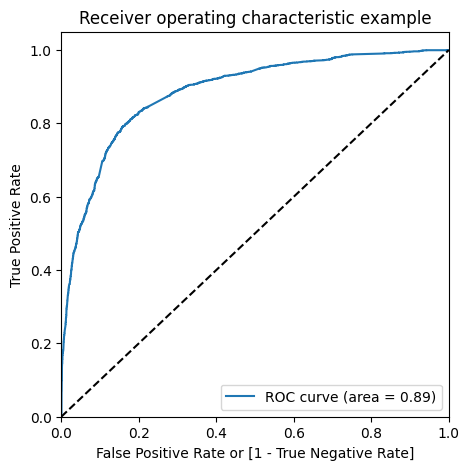

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

####Finding Optimal Cutoff Point

- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [118]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,P ID,predicted,Conv_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.231724,5310,0,0.233468,1,1,1,0,0,0,0,0,0,0
1,0,0.182352,2181,0,0.184148,1,1,0,0,0,0,0,0,0,0
2,0,0.054928,8215,0,0.055517,1,0,0,0,0,0,0,0,0,0
3,0,0.391466,8887,0,0.391654,1,1,1,1,0,0,0,0,0,0
4,0,0.163055,7920,0,0.164647,1,1,0,0,0,0,0,0,0,0


In [119]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.605557  0.968529  0.368974
0.2   0.2  0.734089  0.918568  0.613846
0.3   0.3  0.785160  0.872148  0.728462
0.4   0.4  0.820397  0.778521  0.847692
0.5   0.5  0.819776  0.720299  0.884615
0.6   0.6  0.796181  0.608183  0.918718
0.7   0.7  0.781434  0.525964  0.947949
0.8   0.8  0.755666  0.425256  0.971026
0.9   0.9  0.711270  0.288356  0.986923


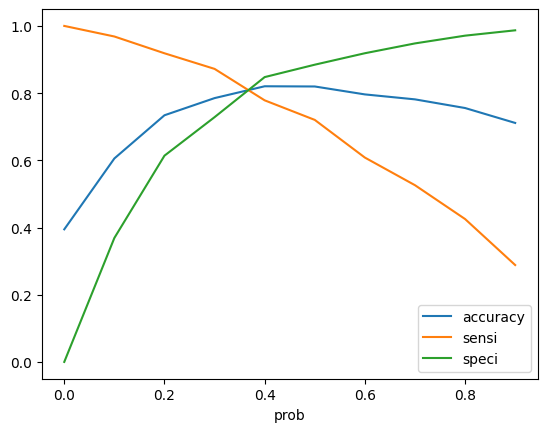

In [120]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,P ID,predicted,Conv_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.231724,5310,0,0.233468,1,1,1,0,0,0,0,0,0,0,0
1,0,0.182352,2181,0,0.184148,1,1,0,0,0,0,0,0,0,0,0
2,0,0.054928,8215,0,0.055517,1,0,0,0,0,0,0,0,0,0,0
3,0,0.391466,8887,0,0.391654,1,1,1,1,0,0,0,0,0,0,0
4,0,0.163055,7920,0,0.164647,1,1,0,0,0,0,0,0,0,0,0


In [122]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8203973921142502

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3306,  594],
       [ 563, 1979]])

In [124]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7785208497246263

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8476923076923077

In [127]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1523076923076923


In [128]:
# Positive predictive value
print (TP / float(TP+FP))

0.7691410804508356


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8544843628844663


## Precision and Recall

In [130]:
#Looking at the confusion matrix again

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3450,  450],
       [ 711, 1831]])

##### Precision
TP / TP + FP

In [132]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8027181060938186

##### Recall
TP / TP + FN

In [133]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7202989771833203

### Precision and recall tradeoff

In [134]:
from sklearn.metrics import precision_recall_curve

In [135]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    1
 6439    1
 6440    0
 6441    0
 Name: Converted, Length: 6442, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6437    1
 6438    1
 6439    1
 6440    1
 6441    1
 Name: predicted, Length: 6442, dtype: int64)

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

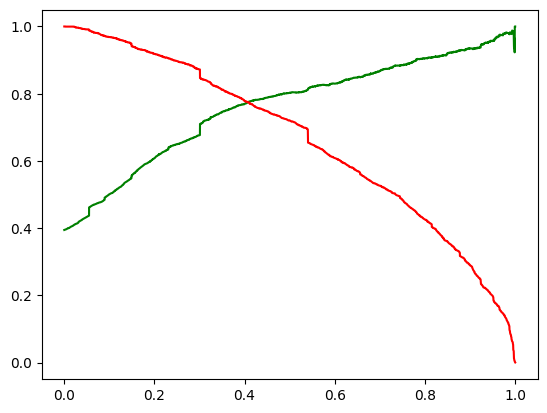

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [138]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_Multiple Sources',
       'How did you hear about X Education_SMS',
       'How did you hear about X Education_Social Media',
       'What is your current occupation_Student',
     

####Making predictions on the test set

In [139]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [148]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Finance Management,Specialization_Hospitality Management,Specialization_International Business,Specialization_Retail Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,What is your current occupation_Student,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
2400,0.846232,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
849,-0.781935,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7459,-0.663688,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6184,0.060346,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4869,1.497498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [149]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

2400    0.663961
849     0.035917
7459    0.096121
6184    0.305479
4869    0.972732
2519    0.941926
5419    0.158712
2103    0.481375
3987    0.055517
3512    0.014683
dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Let's see the head
y_pred_1.head()

,0
2400,0.663961
849,0.035917
7459,0.096121
6184,0.305479
4869,0.972732


In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
# Putting CustID to index
y_test_df['P ID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Converted,P ID,0
0,1,2400,0.663961
1,0,849,0.035917
2,0,7459,0.096121
3,1,6184,0.305479
4,1,4869,0.972732


In [159]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [160]:
# Rearranging the columns
y_pred_final = y_pred_final[['P ID','Converted','Conv_Prob']]

In [161]:
# Let's see the head of y_pred_final
y_pred_final.head()

,P ID,Converted,Conv_Prob
0,2400,1,0.663961
1,849,0,0.035917
2,7459,0,0.096121
3,6184,1,0.305479
4,4869,1,0.972732


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [163]:
y_pred_final.head()

,P ID,Converted,Conv_Prob,final_predicted
0,2400,1,0.663961,1
1,849,0,0.035917,0
2,7459,0,0.096121,0
3,6184,1,0.305479,0
4,4869,1,0.972732,1


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8102824040550326

In [165]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1472,  300],
       [ 224,  766]])

In [166]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7737373737373737

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.8306997742663657



- Specifity is high, it indicates we are able to correctly identify Converted cases for 83% of all population

####Final Model

In [169]:
y_pred_final['Lead Score'] = y_pred_final['Conv_Prob'].apply(lambda x : round(x*100))
y_pred_final.head()

,P ID,Converted,Conv_Prob,final_predicted,Lead Score
0,2400,1,0.663961,1,66
1,849,0,0.035917,0,4
2,7459,0,0.096121,0,10
3,6184,1,0.305479,0,31
4,4869,1,0.972732,1,97


In [170]:
def live_model(X_train,y_train,X_test,y_test,threshold=0.4):
    # Training Data


    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)

    # Train
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['P ID'] = y_train.index
    y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > threshold else 0)
    y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_Prob'].apply(lambda x : round(x*100))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~This is your Training Data~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(y_train_pred_final.head())

    # Final Lead Score
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    # Test
    y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
    y_test_pred_final['P ID'] = y_test.index
    y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_Prob'].apply(lambda x: 1 if x > threshold else 0)
    y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Prob'].apply(lambda x : round(x*100))
    y_test_pred_final.reset_index(drop=True,inplace=True)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~This is your Test Data~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(y_test_pred_final.head())

    metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

    y_test_pred_final.to_csv(r'Final_Predictions.csv',index=False,header=True)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~Output has been exported~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    return

In [171]:
live_model(X_train[col],y_train,X_test[col],y_test,0.4)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~This is your Training Data~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Converted  Converted_Prob  P ID  final_predicted  Lead Score
0          0        0.233468  5310                0          23
1          0        0.184148  2181                0          18
2          0        0.055517  8215                0           6
3          0        0.391654  8887                0          39
4          0        0.164647  7920                0          16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~This is your Test Data~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Converted  Converted_Prob  P ID  final_predicted  Lead Score
0          1        0.663961  2400                1          66
1          0        0.035917   849                0           4
2          0        0.096121  7459

**END**